Importamos las librerias a usar.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


Leemos los documentos parquets que tienen toda la información realizada y filtrada en el ETL, para hacer el analisis de estos mismos.

In [3]:
df_movies = pd.read_parquet(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 1\Datos_clean\movies_clean.parquet')
df_credits_cast = pd.read_parquet(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 1\Datos_clean\credit_cast_clean.parquet')
df_credits_crew = pd.read_parquet(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 1\Datos_clean\credit_crew_clean.parquet')

In [4]:
df_movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return,genres_name,production_companies_name,production_countries_name,spoken_languages_name
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,Toy Story,7.7,5415,1995,12.451801,Animation,Pixar Animation Studios,United States of America,English
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,Toy Story,7.7,5415,1995,12.451801,Comedy,Pixar Animation Studios,United States of America,English
2,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,Toy Story,7.7,5415,1995,12.451801,Family,Pixar Animation Studios,United States of America,English
3,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Jumanji,6.9,2413,1995,4.043035,Adventure,TriStar Pictures,United States of America,English
4,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Jumanji,6.9,2413,1995,4.043035,Adventure,Teitler Film,United States of America,English


In [5]:
df_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,1.343280e+05,134328.000000,134328.000000,1.343280e+05,134328.000000,134328.000000,134328.00000,134328.000000,1.343280e+05
mean,1.422637e+07,92669.924945,6.004988,3.647663e+07,103.731746,5.985439,339.09485,2002.434638,1.064924e+03
std,3.242998e+07,114236.745277,9.909591,1.180111e+08,28.323425,1.278942,906.17321,11.998883,1.045304e+05
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,1970.000000,0.000000e+00
25%,0.000000e+00,13130.750000,1.348270,0.000000e+00,91.000000,5.400000,12.00000,1996.000000,0.000000e+00
50%,0.000000e+00,40110.500000,4.287613,0.000000e+00,100.000000,6.100000,42.00000,2006.000000,0.000000e+00
75%,1.200000e+07,124075.000000,8.628928,1.121229e+07,113.000000,6.800000,217.00000,2012.000000,4.633919e-01
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,931.000000,10.000000,14075.00000,2020.000000,1.239638e+07


In [6]:
df_credits_cast.head()

,id,cast_character,cast_name,cast_order
0,862,Woody (voice),Tom Hanks,0.0
1,862,Buzz Lightyear (voice),Tim Allen,1.0
2,862,Mr. Potato Head (voice),Don Rickles,2.0
3,862,Slinky Dog (voice),Jim Varney,3.0
4,8844,Alan Parrish,Robin Williams,0.0


In [7]:
df_credits_cast.describe()

,id,cast_order
count,157914.000000,157914.000000
mean,96981.740574,1.520549
std,105471.151332,1.100826
min,2.000000,0.000000
25%,23509.000000,1.000000
50%,52772.000000,2.000000
75%,128248.000000,2.000000
max,469172.000000,3.000000


In [8]:
df_credits_crew.head()

,id,crew_name
0,862,John Lasseter
1,8844,Joe Johnston
2,15602,Howard Deutch
3,31357,Forest Whitaker
4,11862,Charles Shyer


In [9]:
df_credits_crew.describe()

,id
count,48999.000000
mean,108217.710770
std,112441.408797
min,2.000000
25%,26355.500000
50%,59833.000000
75%,157339.500000
max,469172.000000


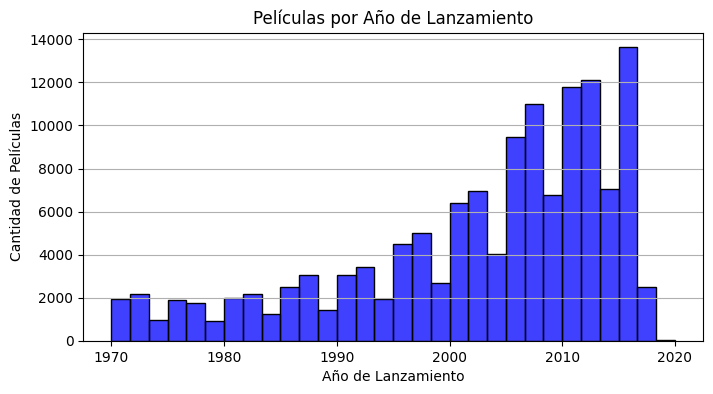

In [10]:
# Utilizamos un Histograma 
plt.figure(figsize=(8, 4))
sns.histplot(df_movies['release_year'], bins=30, kde=False, color='blue')
plt.title('Películas por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.grid(axis='y')
plt.show()

Se ha podido observar que a partir de 1970 ha habido una cantidad creciente de peliculas a lo largo de los años, en el cual alcanza su punto mas alto en un periodo de 10 años entre los años 2010 y 2020, en los cuales tambien se han notado varios datos que han disminuido pero aun asi la grafica ha ido en ascendente, en el momento en que mas hubo una disminucion considerada en los lanzamientos de las peliculas han sido llegando al año 2020, debido a la transición a contenido digital en las diferentes plataformas de streaming 

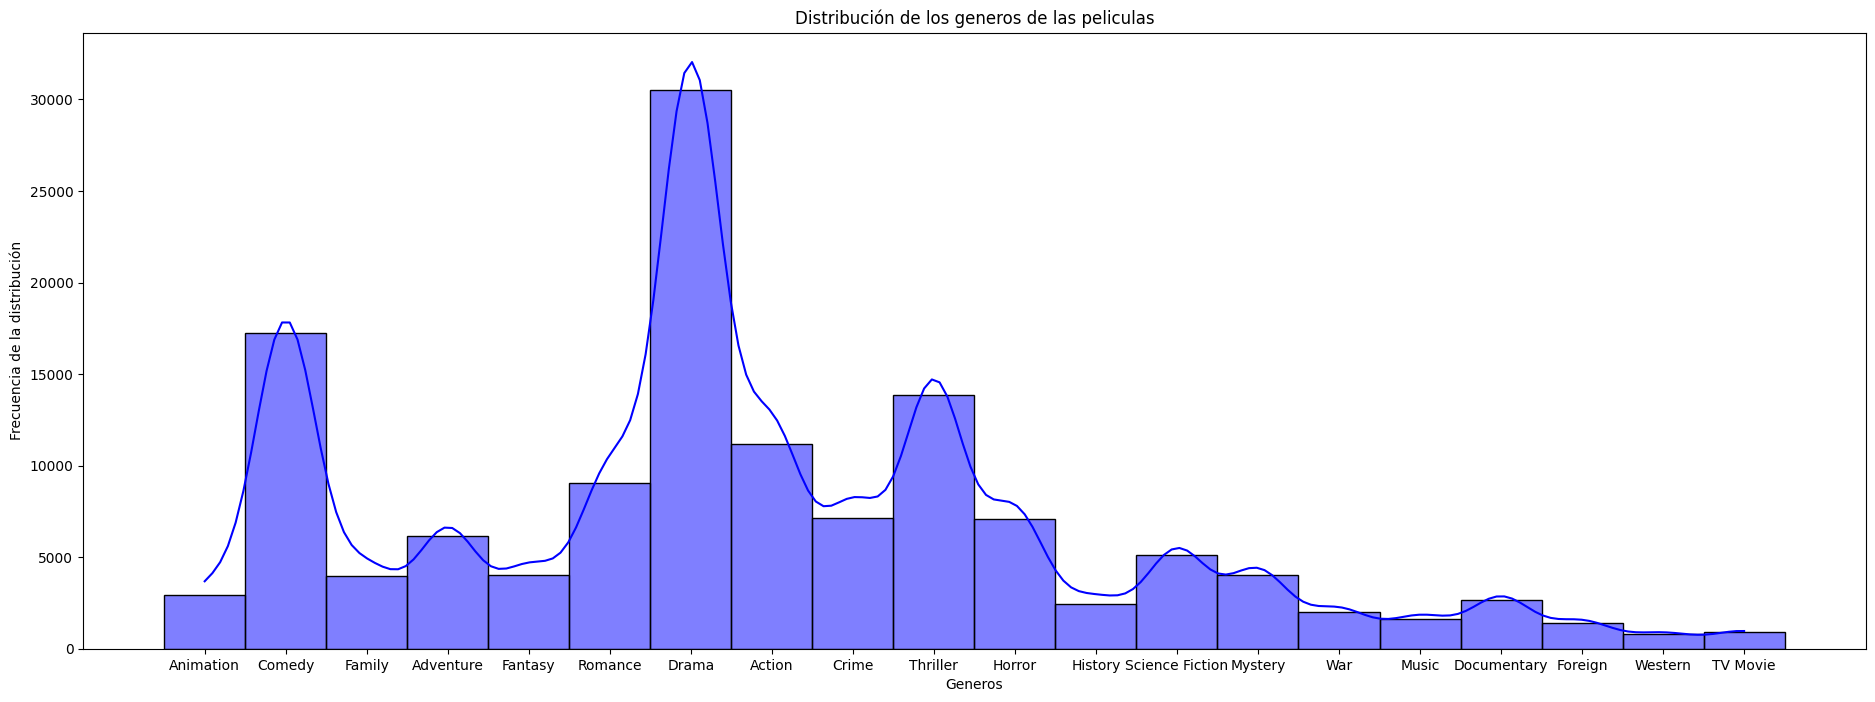

In [11]:
plt.figure(figsize=(23,8))
sns.histplot(df_movies['genres_name'], bins= 40, kde= True, color= 'blue')
plt.title('Distribución de los generos de las peliculas')
plt.ylabel('Frecuencia de la distribución')  
plt.xlabel('Generos')      
plt.show()

En el grafico se puede observar que hay tres picos altos considerables a la distribución de los diferentes generos de las peliculas en las cuales unas son mas valoradas que otras por el publico en general, en el cual se encuentra en el punto mas alto el genero de drama, luego le sigue el genero de comedia, y el tercer genero con mayor distribución es el de Thriller, las cuales son las que el publico ha estado mas en esa sintonia de generos y los otros no han impactado de manera contundente al publico para que tengan una menor distribución.

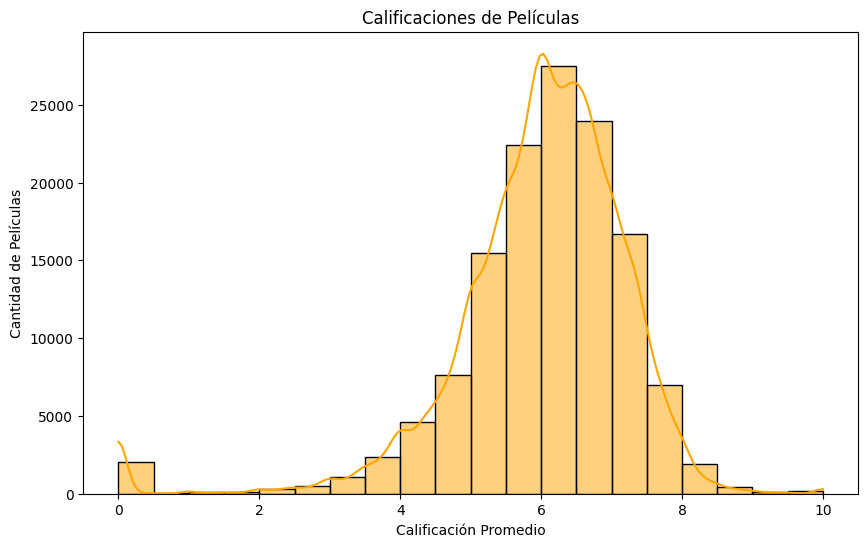

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_movies['vote_average'], bins=20, kde=True, color='orange')
plt.title('Calificaciones de Películas')
plt.xlabel('Calificación Promedio')
plt.ylabel('Cantidad de Películas')
plt.show()

En este grafico podemos observar que hay un pico maximo de calificación por parte del publico en el numero 6, en los cuales ha subido considerablemente entre el 4 y el 6 las peliculas mejores valoradas por el publico en general, ya en 6 y medio se puede observar un segundo pico aunque mas pequeño que el primero y ya despues de ese valor las calificaciones de las peliculas ha empezado a descender debido a que las peliculas no han sido suficientemente atractibas o muy aburridas para el publico en general hasta que llega a un valor de 0.

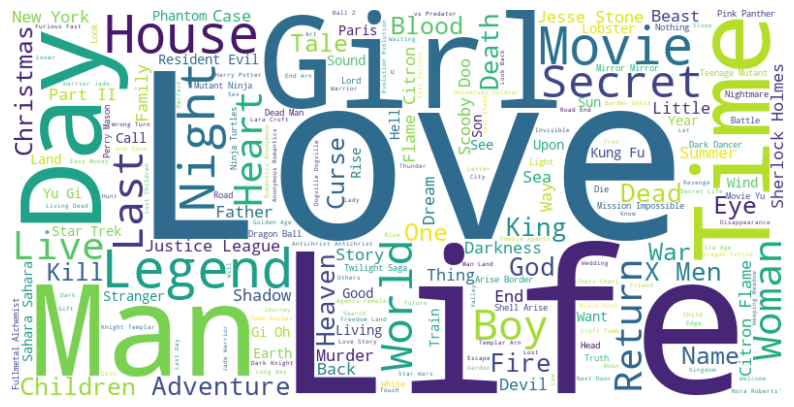

In [13]:
# Generar una nube de palabras para los títulos
text = ' '.join(df_movies['title'].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

La nube de palabras generada refleja a partir de los titulos de las peliculas, un conjunto de las palabras mas frecuentes en los titulos, como "Love", "Girl Movie", "Life", "Day" que van mas relacionadas a titulos de dramas y de peliculas del tipo romance, asi como hay otras de acción como "X Men", "Justice League" y "Resident Evil" que aparecen muy comunmente estos titulos.

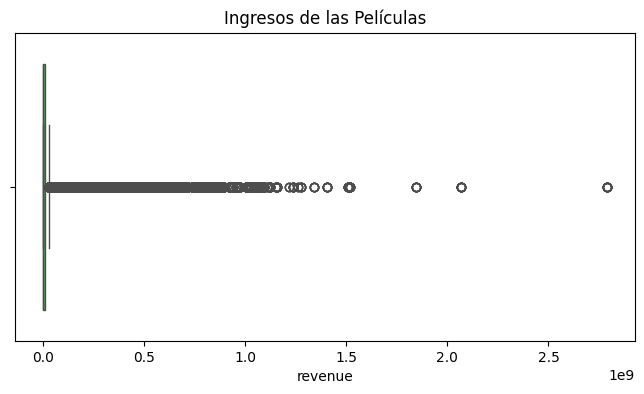

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_movies['revenue'], color='lime')
plt.title('Ingresos de las Películas')
plt.show()

El boxplot muestra una fuerte concentración de los datos hacia el extremo izquierdo, lo que indica que la mayoría de las películas generan ingresos bajos. Aunque, hay un número de outliers que representan películas con ingresos más altos, alcanzando hasta 2.5 mil millones de dólares. Estos outliers sugieren que una pequeña cantidad de películas logra generar ingresos muy altos, mientras que la mayoría se mantiene en un rango mucho más bajo. Se logra ver una gran disparidad en los.



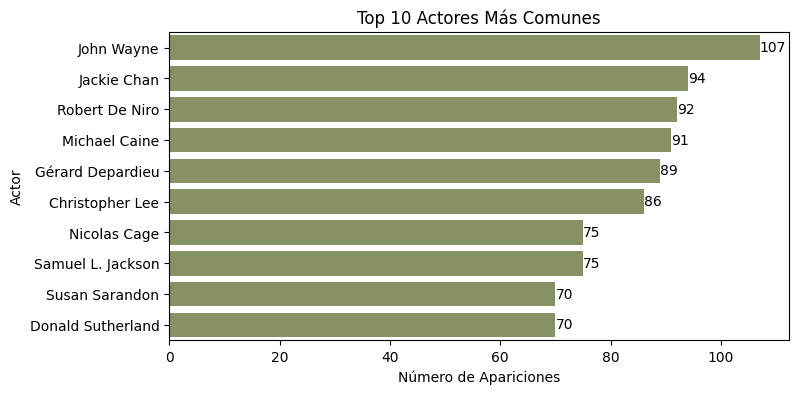

In [15]:
# Generar el gráfico de barras con verde musgo y etiquetas de datos
top_actors = df_credits_cast['cast_name'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_actors.values, y=top_actors.index, color='#8A9A5B')  # Color verde musgo
plt.title('Top 10 Actores Más Comunes')
plt.xlabel('Número de Apariciones')
plt.ylabel('Actor')
# Añadir etiquetas de datos en cada barra
for index, value in enumerate(top_actors.values):
    plt.text(value, index, str(value), va='center', ha='left', color='black')
plt.show()

Estos son los actores con más apariciones en películas. John Wayne y Christopher Lee encabezan la lista con 109 c/u, seguidos por Jackie Chan con 102. Gérard Depardieu, Michael Caine y Robert De Niro tienen apariciones cercanas a los 98 y 99. Estos actores se encuentran dentro del promedio de más de 80 películas en las que han participado. La presencia de actores como Samuel L. Jackson y Donald Sutherland refuerza la tendencia de actores que tienen una participación constante a lo largo del tiempo en múltiples géneros.

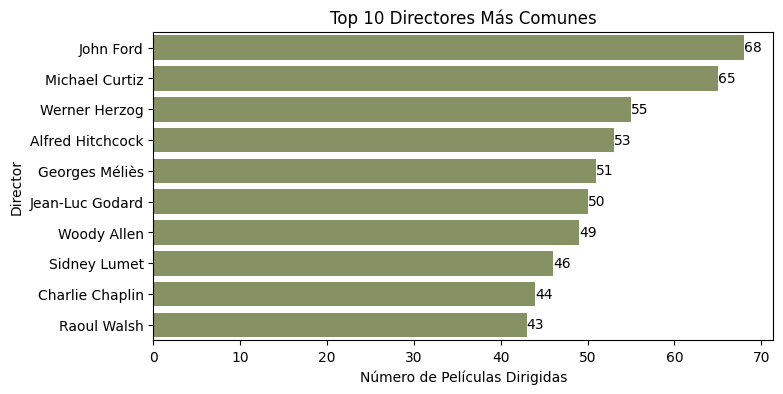

In [16]:
# Generar el gráfico de barras con verde musgo y etiquetas de datos
top_directors = df_credits_crew['crew_name'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_directors.values, y=top_directors.index, color='#8A9A5B')  # Color verde musgo
plt.title('Top 10 Directores Más Comunes')
plt.xlabel('Número de Películas Dirigidas')
plt.ylabel('Director')
# Añadir etiquetas de datos en cada barra
for index, value in enumerate(top_directors.values):
    plt.text(value, index, str(value), va='center', ha='left', color='black')
plt.show()

Los 10 directores más comunes en el data set. John Ford encabeza la lista con 68 películas dirigidas, seguido de Michael Curtiz con 65. Otros directores destacados incluyen a Werner Herzog y Alfred Hitchcock, con 55 y 53 películas respectivamente. También muestra a Georges Méliès, Jean-Luc Godard y Woody Allen, quienes han dirigido entre 43 y 51 películas cada uno. Este análisis destaca la frecuencia de algunos de los directores en la historia del cine.

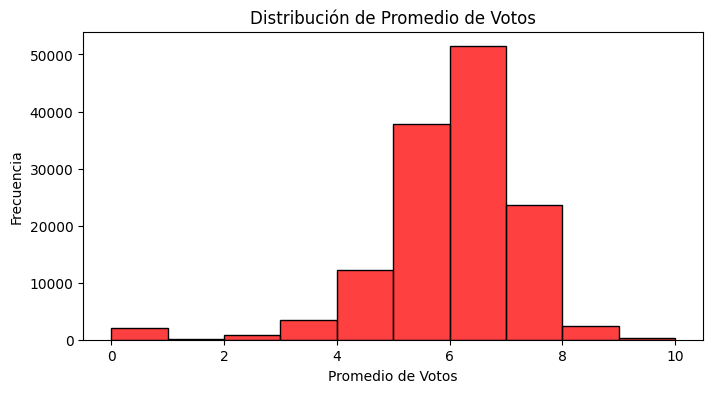

In [17]:
# Histograma de la columna 'vote_average'
plt.figure(figsize=(8, 4))
sns.histplot(df_movies['vote_average'], bins=10, color='red')
plt.title('Distribución de Promedio de Votos')
plt.xlabel('Promedio de Votos')
plt.ylabel('Frecuencia')
plt.show()

El gráfico muestra la distribución del promedio de votos de las películas en el conjunto de datos. La mayoría de las películas tienen un promedio de votos entre 5 y 7, con un pico en la calificación de 6. Esto sugiere que las películas suelen recibir calificaciones moderadas, lo que indica que, en general, no son extremadamente sobresalientes ni muy mal evaluadas. Sin embargo, hay algunos valores atípicos en los extremos, con muy pocas películas que reciben calificaciones muy bajas o muy altas (cercanas a 0 y 10). También podemos decir que las calificaciones de las películas tienden a concentrarse en torno a la media, mientras que las evaluaciones extremas son menos frecuentes.

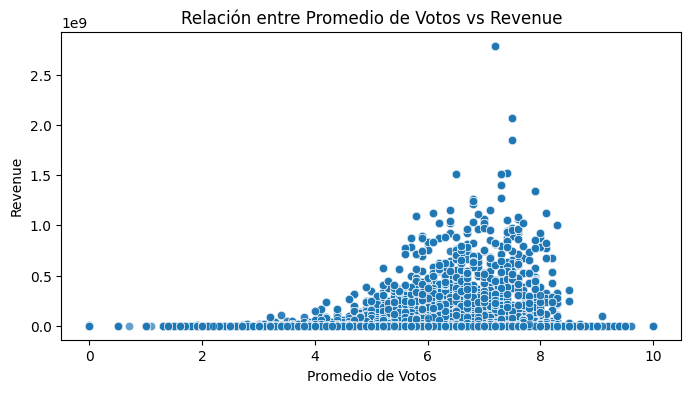

In [18]:
# Análisis bivariado entre revenue y promedio de votos
plt.figure(figsize=(8, 4))
sns.scatterplot(x='vote_average', y='revenue', data=df_movies, alpha=0.7)
plt.title('Relación entre Promedio de Votos vs Revenue')
plt.xlabel('Promedio de Votos')
plt.ylabel('Revenue')
plt.show()

Las películas con mayor promedio de votos tienden a generar mayores ingresos, aunque existen excepciones. Esto resalta la importancia de las críticas positivas en la industria del cine para atraer al público y generar ganancias. Sin embargo, otros factores también parecen influir en los ingresos, ya que no todas las películas con buenos promedios de votos garantizan ingresos altos.

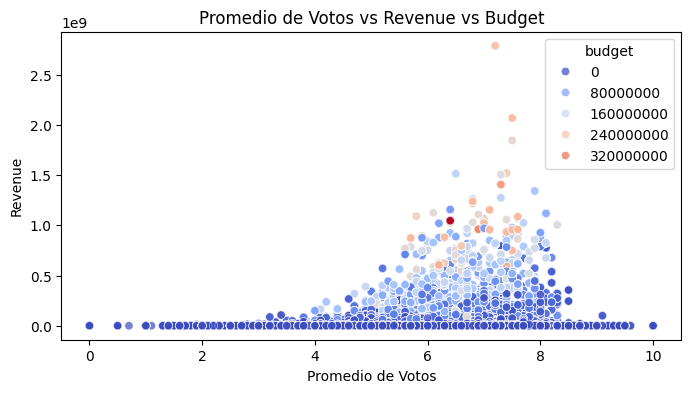

In [19]:
# Análisis multivariado entre revenue, promedio de votos y presupuesto
plt.figure(figsize=(8, 4))
sns.scatterplot(x='vote_average', y='revenue', hue='budget', data=df_movies, palette='coolwarm', alpha=0.7)
plt.title('Promedio de Votos vs Revenue vs Budget')
plt.xlabel('Promedio de Votos')
plt.ylabel('Revenue')
plt.show()


Se puede ver que el presupuesto influye en los ingresos, pero no de manera determinante. Las películas con mayor presupuesto tienden a generar mayores ingresos, pero el promedio de votos también juega un rol importante en el rendimiento financiero. No obstante, tanto el éxito crítico como el éxito financiero pueden depender de múltiples factores, y una gran inversión no siempre garantiza altos ingresos ni una mejor recepción del público.